In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [2]:
def load_housing_data():
    tarball_path = Path("Spreadsheets/housing.tgz")
    if not tarball_path.is_file():
        Path("Spreadsheets").mkdir(parents=True , exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="Spreadsheets")
    return pd.read_csv(Path("Spreadsheets/housing/housing.csv"))

housing = load_housing_data()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


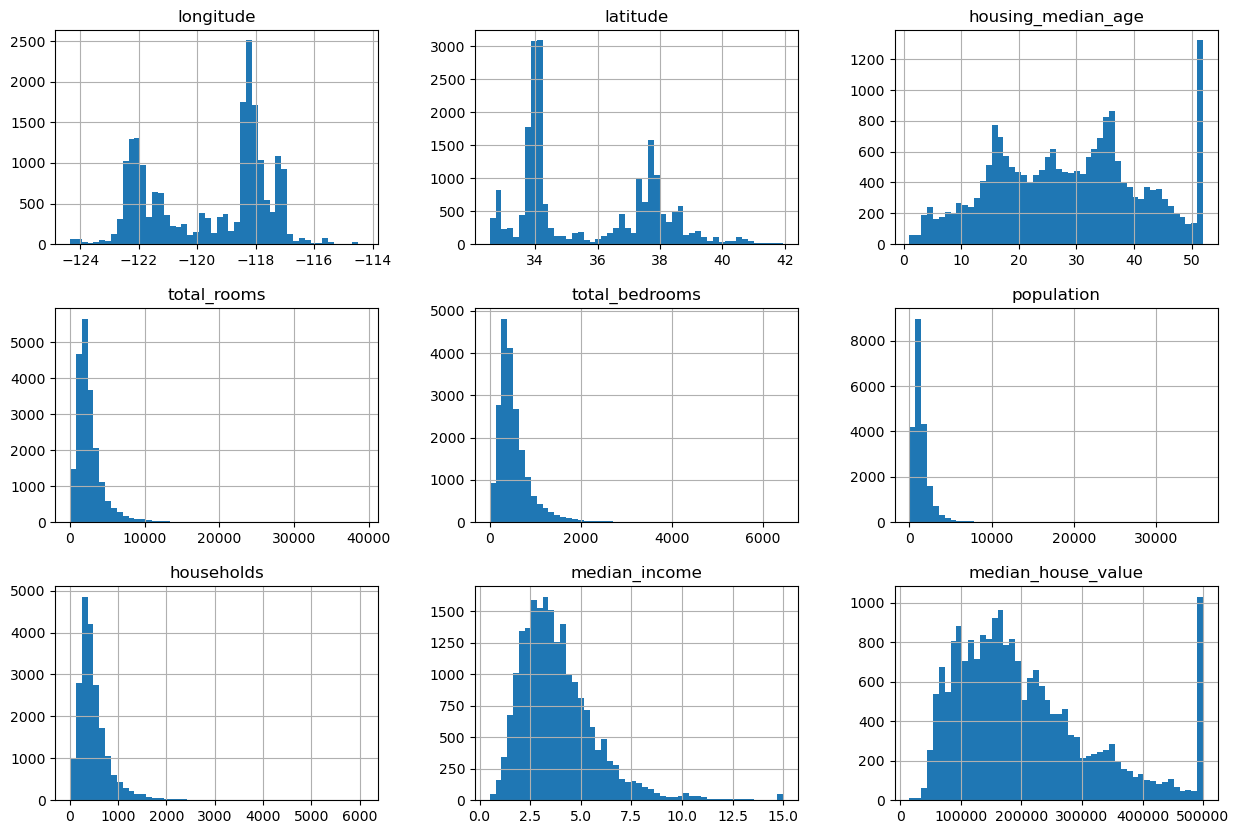

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50 , figsize=(15,10))
plt.show()

In [8]:
import numpy as np

def shuffle_and_split_data(data , test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [9]:
train_set , test_set = shuffle_and_split_data(housing , 0.2)
len(train_set)
len(test_set)

4128

In [10]:
#Data Split for training and testing
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size=0.2, random_state=42)

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.,1.5,3.0,4.5,6.,np.inf] , labels=[1,2,3,4,5])

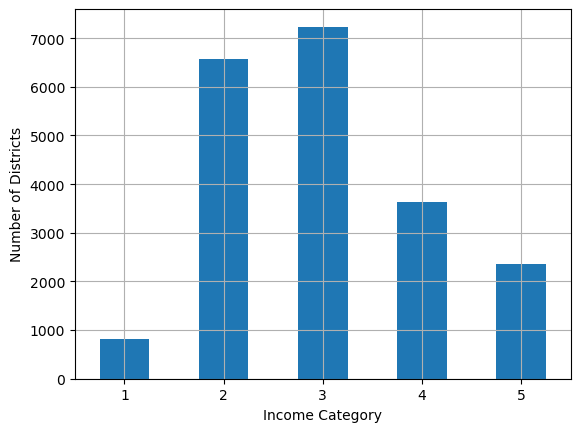

In [12]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0 , grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [14]:
strat_train_set, strat_test_set = strat_splits[0]

In [15]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [16]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [17]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Exploration and Visualization of data

In [18]:
housing = strat_train_set.copy()

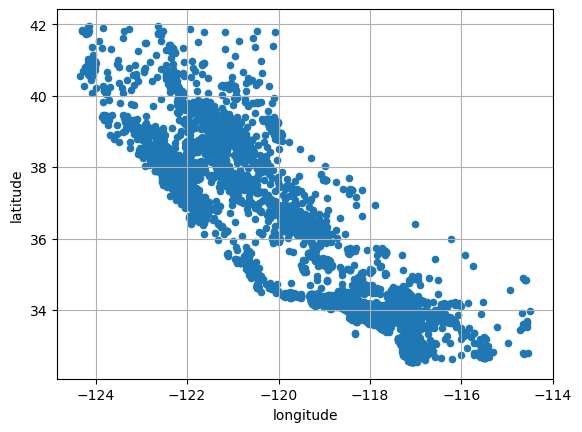

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

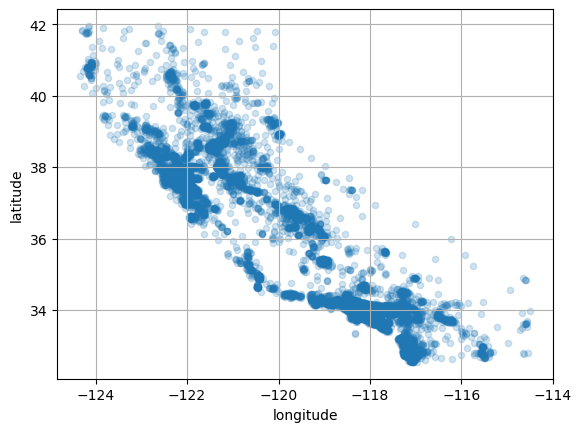

In [20]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2)
plt.show()

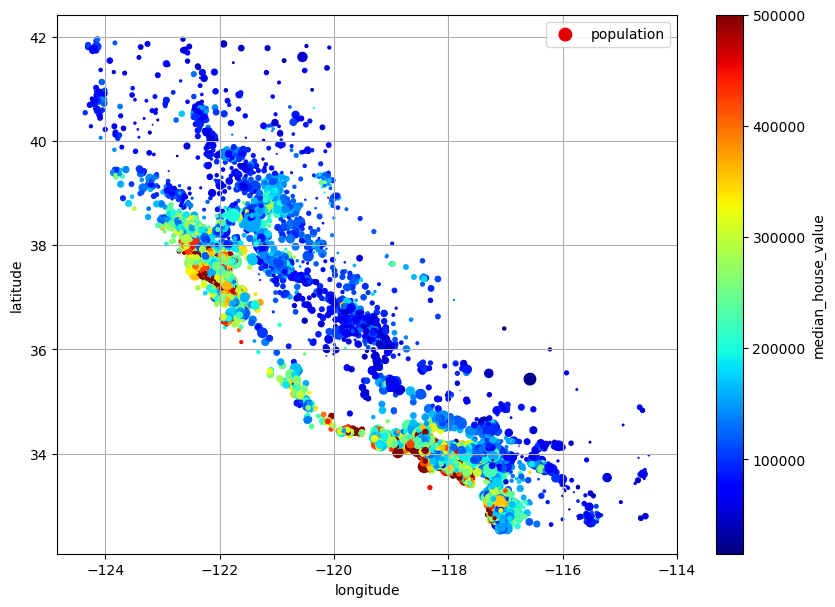

In [21]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True, s=housing["population"]/100 , label="population",
            c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False , figsize=(10,7))
plt.show()

In [22]:
#Computing Correlation
corr_matrix = housing.corr()

In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

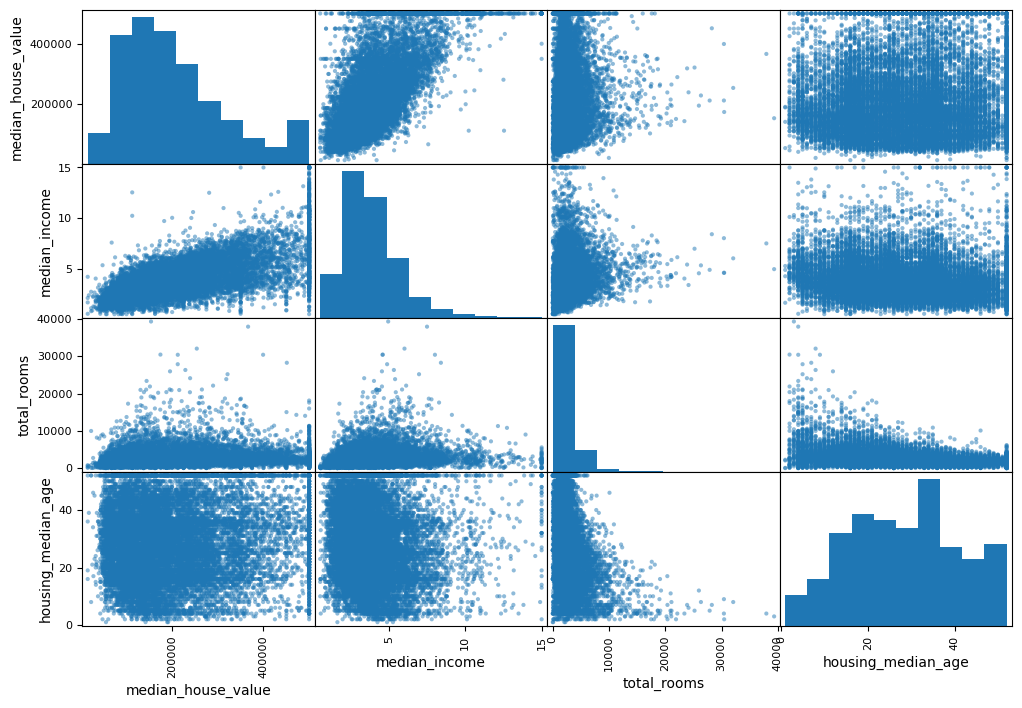

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms" , "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

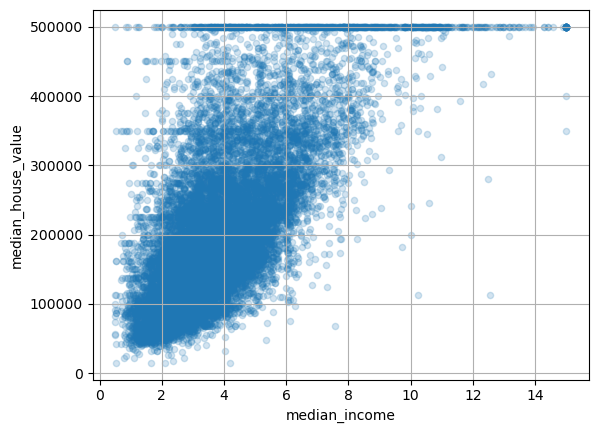

In [25]:
housing.plot(kind="scatter",x="median_income", y="median_house_value", alpha=0.2,grid=True)
plt.show()

In [26]:
#Creating new combinations of attributes
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [27]:
housing = strat_train_set.drop("median_house_value" , axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [28]:
# Dealing with null values in total_rooms attribute
# housing.dropna(subset=["total_bedrooms"], inplace=True) Removes the null instances of the attribute
#housing.drop("total_bedrooms", axis=1)  Removes the entire attribute
#median = housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median, inplace=True) Replaces null values with the median 
#Below is also does the same
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") #Imputer stores median value of each feature

In [29]:
# Only numerical attributes can have a median so creating a copy of numerical attributes
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [30]:
#All medians stored in statistics_  instance variable of imputer
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [31]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [32]:
#Transforming data containing null values
X = imputer.transform(housing_num)
X  # output of imputer.transform is a numpy array

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [33]:
#We can create a dataframe from X using DataFrame function
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


# Handling Text and Categorical Attributes

In [34]:
#"ocean_proximity is a text attribute"
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


We work with numerical data in ML algorithms. To convert this attribute we use Scikit-Learn's Ordinal Encoder

In [35]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [36]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [37]:
#Listing out all the categorical values
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Another encoder is OneHotEncoder. It creates a binary attribute per category. For e.g. one attribute equal to 1 when the category is "<1H OCEAN" (and 0 otherwise)

In [38]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [39]:
# Output of OneHotEncoder is a SciPy sparse matrix instead of a numpy array
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

A sparse matrix internally only stores non-zero values and their positions. It becomes efficient when there are 100s of categories per attribute 
To get either numpy array either set sparse=False when calling OneHotEncoder or use toarray() function

In [40]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
# Any Scikit-Learn estimator stores the column names in feature_names_in_ attribute. Scikit-Learn ensures that any dataframe fed
# to this estimator has same column names
# We can use get_feature_names_out() to build a dataframe around transformer output
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [42]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

# Feature Scaling and Transformation

To ensure that ML algorithms perform better we need to do feature scaling so that any algorithm is not biased against median values in numerical attributes. We do either min-max scaling or standardization

##  Min-Max Scaling

For each attribute, values are shifted and rescaled by subtracting the min value and dividing it by Max-Min. Resultant scaled value ranges between 0 and 1. Scikit-Learn provides MinMaxScaler transformer for this. We can change range using feature_range hyperparameter.

In [43]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

## Standardization

First mean value is subtracted(so standardized values have mean=0) and then it is divided by standard deviation ( so standard deviation of standardized values=1). It does not restrict values to a specific range unlike min-max but it is less susceptible to outliers as compared to min-max.

In [44]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

Both min-max and standardization squish the heavy tail data into smaller range. However before any scaling, heavy tail must be trimmed to make it more symmetrical ( like replacing a feature with its power between 0 and 1 or log in case of long heavy tail)

Another way is to bucketize features into equal sized buckets replacing each feature value with index of bucket it belongs to. This yields an uniform distribution hence no need for further scaling. We can divide by no. of buckets to force 0-1 range.

For multimodal distributions(>1 peaks) bucketizing by taking bucket IDs as categories allows regression model to easily learn different rules for different ranges.

Another approach for tranforming multimodal distributions is to add a feature for rach of its modes(peaks) representing similarity between feature and particular mode. This similarity is computed using radial basis function: it depends on distance between input value and fixed point. Eg Gaussian RBF. For feature value x, Gaussian RBF = exp(-γ(x-35)<sup>2</sup>
Gamma(γ) determines how quickly similarity measure decays as x moves away from 35.
We can use Scikit Learn's rbf_kernel() for this.

In [45]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]] , gamma=0.1)

The target values may also need to be transformed. We can transform the target variables, train some model and use inverse_transform() method to make predictions on new data.
StandardScaler expects 2D inputs therefore convert accordingly.

In [46]:
# Training a Linear Regression model on median income feature
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) #to_frame() converts pandas series to a dataframe

model = LinearRegression()
model.fit(housing[["median_income"]] , scaled_labels)

some_new_data = housing[["median_income"]].iloc[:5] #Assuming it to be new data
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

This conversion of labeled data to scaled data, training model and unscaling can be done by TransformedTargetRegressor

In [47]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression() , transformer=StandardScaler())

model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

# Custom Transformers

## Transformations not requiring any training

We can write a custom transformer function taking numpy array as input and outputs a tranformed array. For eg transformer to convert population to log population.

In [48]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [49]:
# Computing Gaussian RBF with FunctionTransformer
rbf_transformer = FunctionTransformer(rbf_kernel , kw_args=dict(Y=[[35.]] , gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

## Transformations requiring any training

Need to write a custom class containing 3 methods: fit()(returns self), transform(), fit_transform()

Below is a custom transformer performing like StandardScaler

In [90]:
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.utils.validation import check_array , check_is_fitted

class StandardScalerClone(BaseEstimator , TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean
    def fit(self, X , y=None):
        X = check_array(X)  # checks X is a finite float values array
        self.mean = X.mean(axis=0)
        self.scale = X.std(axis=0)
        self.n_features_in_ = X.shape[1] # every estimator stores this in fit()
        return self
    def transform(self, X):
        check_is_fitted(self) #looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

Always try to validate input using functions from sklearn.utils.validation package
fit() method also has y because sklearn pipelines require it.
fit() method must return self
Custom Transformer can use other estimators in its implementation

Lets build a custom transformer ClusterSimilarity using KMeans estimator

In [91]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator , TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [92]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.,random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]] , sample_weight=housing_labels)

In [93]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

# Transformation Pipelines

In [94]:
# Pipeline to impute then scale the data
from sklearn.pipeline import Pipeline

#To visualize Pipeline
import sklearn
sklearn.set_config(display="diagram")

num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")), 
                         ("standardize", StandardScaler()),
                        ])

# names/estimators in the tuple should not have __ in them
# estimators must be transformers i.e. have fit_transform method except the last one

# To not name transformer use below code
# from sklearn.pipeline import make_pipeline

# num_pipeline = make_pipeline(SimpleTmputer(strategy="median") , StandardScaler())

In [95]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

Calling fit() method of a pipeline calls fit_transform() on all transformers sequentially passing the output of each as a parameter to next call until the last estimator for which fit() is called
All transformations are applied to data sequentially.
If the final estimator happens to be a predictor then pipeline would rather have predict() method instead of transform()

In [96]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

In [97]:
#Preparing a dataframe of this
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared,
    columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index
)

df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


We have handled categorical and numerical attributes separately. Lets use ColumnTransformer as a single transformer for both

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_attribs = ["longitude" , "latitude", "housing_median_age", "total_rooms", 
               "total_bedrooms", "population","households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                            OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline , num_attribs),
    ("cat" , cat_pipeline , cat_attribs),
])

In [99]:
 #We can use make_column_selector function to select attributes/columns of some type. We can use make_column_transformer
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [100]:
housing_prepared = preprocessing.fit_transform(housing)

In [101]:
print(sklearn.__version__)

1.5.1


In [102]:
#Constructing a Single Pipeline
def column_ratio(X):
    return X[: , [0]] / X[: , [1]]

def ratio_name(function_transformer , feature_names_in):
    return ["ratio"]
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log , feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(),["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(),["population", "households"]),
    ("log", log_pipeline,["total_bedrooms", "total_rooms","population",
                                         "households", "median_income"]),
    ("geo", cluster_simil,["latitude", "longitude"] ),
    ("cat", cat_pipeline,make_column_selector(dtype_include=object)),
],
remainder=default_num_pipeline)

In [103]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

# Select and Train a Model

In [104]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())

lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000278DEF37B50>)])),
                ('linearregression', LinearRegression())])

In [105]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([246000., 372700., 135700.,  91400., 330900.])

In [106]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [107]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)

lin_rmse

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


68972.88910758533

Median Housing value is between $120,000 - $265,000. So RMSE of $68,972 indicates of a model underfitting. Lets use Decision Tree

In [108]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000278DEF37B50>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [109]:
housing_predictions = tree_reg.predict(housing)

tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_rmse

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.0

RMSE of 0 could indicate Overfitting. We will evaluate using cross validation
# Better Evaluation Using Cross-Validation

We will use k-Cross validation to split the training set into k-1 folds for training and one for validation

In [110]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error" , cv=10)

In [111]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67013.360949
std       1460.198570
min      64289.376198
25%      66776.146282
50%      67086.216281
75%      68140.275029
max      68659.294290
dtype: float64

In [112]:
#Computing cross validation for linear regression model
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [113]:
pd.Series(lin_rmses).describe()

count       10.000000
mean     70003.404818
std       4182.188328
min      65504.765753
25%      68172.065831
50%      68743.995249
75%      70344.943988
max      81037.863741
dtype: float64

Decision Tree model seems to perfom better than Linear Regression but this is due to severe overfitting as training error is low (0) whereas validation error is very high.
Lets try Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(forest_reg , housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [115]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47124.604437
std       1069.311372
min      45292.329302
25%      46712.106520
50%      47172.209883
75%      47561.377695
max      49354.705514
dtype: float64

In [116]:
forest_reg.fit(housing , housing_labels)
forest_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels , forest_predictions , squared=False)
forest_rmse

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


17519.685029292894

RMSE indicates that there still is lot of Overfitting going on in Random Forest.

# Fine Tuning the Models

Manually experimenting with hyperparameters will be time consuming. We can use Grid Search which uses cross validation to find optimal values of hyperparameters.

## GridSearch

In [117]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {'preprocessing__geo__n_clusters':[5,8,10],
     'random_forest__max_features':[4,6,8]},
    {'preprocessing__geo__n_clusters':[10,15,20],
     'random_forest__max_features':[6,8,10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000278DEF37B50>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15, 20],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [118]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 20, 'random_forest__max_features': 6}

In [119]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score" , ascending=False, inplace=True)
[...]
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
15,8.226315,0.064941,0.247219,0.006108,20,6,"{'preprocessing__geo__n_clusters': 20, 'random...",-42281.944944,-43416.235398,-44225.820806,-43308.000383,797.265935,1
16,10.493133,0.150850,0.225359,0.001980,20,8,"{'preprocessing__geo__n_clusters': 20, 'random...",-42682.087778,-43592.598651,-44158.951250,-43477.879226,608.359454,2
17,12.608126,0.231172,0.225112,0.007528,20,10,"{'preprocessing__geo__n_clusters': 20, 'random...",-43340.028110,-43980.177433,-44626.231866,-43982.145803,525.092329,3
12,8.110570,0.013152,0.243842,0.016466,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43520.694854,-43958.237963,-44759.841846,-44079.591555,513.105796,4
13,10.540601,0.029975,0.235746,0.000631,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44027.285408,-44179.627865,-45007.255144,-44404.722806,430.570141,5


GridSearch is preferable when the combinations of hyperparameters to check is minimum. However when hyperparameter space to check is large it is better to go with RandomizedSearchCV


## RandomizedSearchCV
For each hyperparameter either provide a list of all possible values or a probability distribution

In [120]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                   'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=params_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000278DEF5D850>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000278DF9E0BB0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

# Model Analysis

In [121]:
final_model = rnd_search.best_estimator_
feature_importances = final_model['random_forest'].feature_importances_
feature_importances.round(2)

array([0.06, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.01, 0.01,
       0.01, 0.  , 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [122]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), 
      reverse=True)

[(0.18836603202647126, 'log__median_income'),
 (0.07795960969938898, 'cat__ocean_proximity_INLAND'),
 (0.06110388595864347, 'bedrooms__ratio'),
 (0.05772194900488602, 'rooms_per_house__ratio'),
 (0.04569274355282605, 'people_per_house__ratio'),
 (0.041977095119231075, 'geo__Cluster 30 similarity'),
 (0.024893290428216707, 'geo__Cluster 9 similarity'),
 (0.02349145973584661, 'geo__Cluster 36 similarity'),
 (0.021384735075780065, 'geo__Cluster 18 similarity'),
 (0.019231937253583756, 'geo__Cluster 3 similarity'),
 (0.019114201150802552, 'geo__Cluster 32 similarity'),
 (0.01740110192655986, 'geo__Cluster 25 similarity'),
 (0.016281601452371793, 'geo__Cluster 1 similarity'),
 (0.015974756525084677, 'geo__Cluster 26 similarity'),
 (0.014014150061434243, 'geo__Cluster 7 similarity'),
 (0.013588284206905332, 'geo__Cluster 10 similarity'),
 (0.01344850861123562, 'geo__Cluster 12 similarity'),
 (0.013432151644106247, 'geo__Cluster 34 similarity'),
 (0.012971875049373518, 'geo__Cluster 19 simila

# Evaluation on Test Set

In [123]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions , squared=False)
print(final_rmse)

41422.168800999665


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [124]:
# Getting 95% confidence interval
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([39272.70918656, 43465.46272048])

# Saving the Model

In [125]:
import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']